# Marketing Analytics For E-Commerce Market Place Company

### Importing packages

In [1022]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)

import warnings
warnings.filterwarnings("ignore")

In [1023]:
os.chdir("G:\FullStack AI\DataScience\Projects\Python Foundation End to End Case Study")
os.getcwd()

'G:\\FullStack AI\\DataScience\\Projects\\Python Foundation End to End Case Study'

In [1024]:
## Reading the Files 

customers = pd.read_csv("CUSTOMERS.csv")
geo_location = pd.read_csv("GEO_LOCATION.csv")
order_items= pd.read_csv("ORDER_ITEMS.csv")
order_payments = pd.read_csv("ORDER_PAYMENTS.csv")
order_review_ratings = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
orders = pd.read_csv("orders.csv")
products =pd.read_csv("PRODUCTS.csv")
sellers = pd.read_csv("SELLERS.csv")

In [313]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1025]:
customers.shape

(99441, 5)

In [1026]:
df =pd.DataFrame()
df = pd.merge(customers,orders,how="left",on="customer_id")
df = pd.merge(df,order_items,how="left",on="order_id")
df = pd.merge(df,order_review_ratings,how="left",on="order_id")
df= pd.merge(df,sellers,how="left",on="seller_id")
df=pd.merge(df,products,how="left",on="product_id")
df=pd.merge(df,order_payments,how="left",on="order_id")

### Merged the Data into Customer 360 dataframe 

In [1027]:
df.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119151 non-null  object 
 1   customer_unique_id             119151 non-null  object 
 2   customer_zip_code_prefix       119151 non-null  int64  
 3   customer_city                  119151 non-null  object 
 4   customer_state                 119151 non-null  object 
 5   order_id                       119151 non-null  object 
 6   order_status                   119151 non-null  object 
 7   order_purchase_timestamp       119151 non-null  object 
 8   order_approved_at              118974 non-null  object 
 9   order_delivered_carrier_date   117065 non-null  object 
 10  order_delivered_customer_date  115730 non-null  object 
 11  order_estimated_delivery_date  119151 non-null  object 
 12  order_item_id                 

####  Contains *33 columns* 
       
       3 types of variables 1) Int64, 2)Float64 3) Objects

## Numerical Data 

In [1028]:
features = df.columns.tolist()

In [1029]:
df =df[df.columns.difference(["seller_zip_code_prefix",
"product_length_cm","product_height_cm","product_width_cm","product_description_lenght",
 "review_answer_timestamp","customer_zip_code_prefix","customer_unique_id","geolocation_city","geolocation_state" ])]

In [1030]:
features = df.columns.tolist()

In [1031]:
df.shape

(119151, 29)

In [1032]:
numerical_features = [i for i in df.columns.tolist() if df[i].dtypes in ['float64','int64']  and '_id' not in i]

In [1033]:
print("Number of Numerical variables without ids {}".format(len(numerical_features)))

Number of Numerical variables without ids 9


In [1034]:
num_cont_features= [i for i in numerical_features if df[i].nunique() >25 ]
num_cat_features = [i for i in numerical_features if df[i].nunique ()<25 ]


print("Numerical Continuous Features {}" .format(len(num_cont_features)))
print("Numerical Categorical Features {}" .format(len(num_cat_features)))


Numerical Continuous Features 6
Numerical Categorical Features 3


## Temporal Data

In [1035]:
temporal = [i for i in df.columns.tolist() if df[i].dtypes in ['object'] and "date" in i or "time" in i or "_at" in i and'_id' not in i]

In [1036]:
len(temporal)

7

In [1037]:
df[temporal]= df[temporal].apply(lambda x : pd.to_datetime(x))

In [1038]:
print("the {} temporal varaibles".format(len(temporal)))
temporal

the 7 temporal varaibles


['order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_purchase_timestamp',
 'review_creation_date',
 'shipping_limit_date']

In [1040]:
df[temporal].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_approved_at              118974 non-null  datetime64[ns]
 1   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 2   order_delivered_customer_date  115730 non-null  datetime64[ns]
 3   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 4   order_purchase_timestamp       119151 non-null  datetime64[ns]
 5   review_creation_date           119151 non-null  datetime64[ns]
 6   shipping_limit_date            118318 non-null  datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 7.3 MB


## Categorical Features

In [1041]:
cat_features = [ i for i in df.columns.tolist() if df[i].dtypes == 'O' and i not in temporal and "_id" not in i]

In [1042]:
print( "Number of Cat Features {}" .format(len(cat_features)))
cat_features

Number of Cat Features 7


['customer_city',
 'customer_state',
 'order_status',
 'payment_type',
 'product_category_name',
 'seller_city',
 'seller_state']

In [1043]:

for i in cat_features:
    print('{} contains  {} categories ' .format(i,(df[i].nunique())))
for i in num_cat_features:
    print('{} contains  {} categories ' .format(i,(df[i].nunique())))
 

customer_city contains  4119 categories 
customer_state contains  20 categories 
order_status contains  8 categories 
payment_type contains  5 categories 
product_category_name contains  71 categories 
seller_city contains  534 categories 
seller_state contains  19 categories 
payment_installments contains  24 categories 
product_photos_qty contains  19 categories 
review_score contains  5 categories 


## IDS 

In [1044]:
ids = [i for i in df.columns.tolist() if '_id' in i]
len(ids)

6

In [1045]:
len(ids)+len(numerical_features)+len(temporal)+len(cat_features)

29

## Missing Values 

In [1046]:
missing = pd.DataFrame()
missing["Features"] = df.columns
missing["Missing_Values"] = [ df[i].isnull().sum() for i in df.columns ]
missing

,Features,Missing_Values
0,customer_city,0
1,customer_id,0
2,customer_state,0
3,freight_value,833
4,order_approved_at,177
5,order_delivered_carrier_date,2086
6,order_delivered_customer_date,3421
7,order_estimated_delivery_date,0
8,order_id,0
9,order_item_id,833


In [ ]:
missing_ = missing[missing["Missing_Values"]>0]

plt.figure(figsize=(40,8))
plt.title("Missing Values",fontsize=20)
sns.barplot(x='Features', y='Missing_Values',data=missing_)
plt.show()

## 1. Perform Detailed exploratory analysis

#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
products, Total categories, Total sellers, Total locations, Total channels, Total
payment methods etc…) 

In [1047]:
total_revenue= df.payment_value.sum()
Total_quantity= df.product_id.shape[0]
Total_products_sold= df.product_id.nunique()
Total_categories= df.product_category_name.nunique()
Total_sellers=df.seller_id.nunique()
Total_locations=df.customer_city.nunique()
Total_payment_mode=df.payment_type.nunique()


print("Total Revenue: {}".format(total_revenue))
print("Total quantity: {}".format(Total_quantity))
print("Total_products_sold: {}".format(Total_products_sold))

print("Total_categories: {}".format(Total_categories))
print("Total_locations: {}".format(Total_locations))
print("Total_sellers: {}".format(Total_sellers))
print("Total_payment_mode: {}" .format(Total_payment_mode))
#print()


Total Revenue: 20581109.619999997
Total quantity: 119151
Total_products_sold: 32951
Total_categories: 71
Total_locations: 4119
Total_sellers: 3095
Total_payment_mode: 5


#### b) how many new customers acquired every month

In [1048]:
df["ordered_date"]= df["order_purchase_timestamp"].dt.to_period('M')

In [1049]:
df["ordered_date_str"] = df.ordered_date.sort_values(ascending=False).astype("str")

In [1050]:
df2 = dict({"ordered_date":[],"customer_id":[]})
df2

{'ordered_date': [], 'customer_id': []}

In [1051]:
for i in df.ordered_date_str.unique():
    df2["ordered_date"].append(i)
    df2["customer_id"].append(list(set(df.loc[(df["ordered_date_str"]==i),"customer_id"].tolist())))

In [1053]:
df2 =pd.DataFrame(df2)

In [1054]:
df2=df2.sort_values(by='ordered_date',ignore_index = True)

In [1055]:
def acquire(jj, datt):
    count=0
    for i in jj:
        if i not in datt:
             count =count+1
    
    return(count)

In [1056]:
acquired_cust =dict({"Year" : [], "Acquired_Cust": []})
#pd.DataFrame(acquired_cust)

## Finding for 9 months 

In [1057]:
dat =list() #customer id list

a=dict() # to map customer and their date

dat =df2.loc[(df1['ordered_date']=='2016-09'),'customer_id'][0]# Adding 2016-09 customer_ids
acquired_cust['Year'].append('2016-09')
acquired_cust['Acquired_Cust'].append(len(dat))
for i in df1['ordered_date'][1:10]: ##Change this to find for all the months
    for j in df2.loc[(df1['ordered_date']==i),'customer_id']:
        acquired_cust['Year'].append(i)
        acquired_cust['Acquired_Cust'].append(acquire(j,dat))
        #print("Number of unique customers acquired {}".format(acquire(j,dat)))
        dat=dat+j
    

In [1058]:
acquired_customer = pd.DataFrame(acquired_cust)
acquired_customer

,Year,Acquired_Cust
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


####  c. Understand the retention of customers on month on month basis


#### Method 1

In [1059]:
start_date= df.groupby('customer_id')['ordered_date'].min().reset_index()

start_date.head()

,customer_id,ordered_date
0,00012a2ce6f8dcda20d059ce98491703,2017-11
1,000161a058600d5901f007fab4c27140,2017-07
2,0001fd6190edaaf884bcaf3d49edf079,2017-02
3,0002414f95344307404f0ace7a26f1d5,2017-08
4,000379cdec625522490c315e70c7a9fb,2018-04


In [1060]:
#df["start_date"] = df.loc[(df['customer_id']==start_date['customer_id']),'ordered_date'].min()
df['start_date'] = df['customer_id'].apply(lambda X : df.loc[df['customer_id']==X,'ordered_date'].min())

In [1061]:
df[['start_date','customer_id','ordered_date']]


,start_date,customer_id,ordered_date
0,2017-05,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05
1,2018-01,18955e83d337fd6b2def6b18a428ac77,2018-01
2,2018-05,4e7b3e00288586ebd08712fdd0374a03,2018-05
3,2018-03,b2b6027bc5c5109e529d4dc6358b12c3,2018-03
4,2018-07,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07
...,...,...,...
119146,2018-04,17ddf5dd5d51696bb3d7c6291687be6f,2018-04
119147,2018-04,e7b71a9017aa05c9a7fd292d714858e8,2018-04
119148,2018-04,5e28dfe12db7fb50a4b2f691faecea5e,2018-04
119149,2017-11,56b18e2166679b8a959d72dd06da27f9,2017-11


In [1063]:
df[df["start_date"].dt.month - df['ordered_date'].dt.month>0]

,customer_city,customer_id,customer_state,freight_value,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,order_purchase_timestamp,order_status,payment_installments,payment_sequential,payment_type,payment_value,price,product_category_name,product_id,product_name_lenght,product_photos_qty,product_weight_g,review_creation_date,review_id,review_score,seller_city,seller_id,seller_state,shipping_limit_date,ordered_date,ordered_date_str,start_date


### The dataframe is empty so no customer is retained.

In [30]:
#temp = df.groupby(['ordered_date','customer_id'])[['customer_city']].count().reset_index()

In [32]:
#temp_df = temp.pivot('customer_id','ordered_date','customer_city' )


In [33]:
#temp_df1 =temp_df.reset_index()

In [617]:
#temp_df

# No retention Retention customer is 0

In [38]:
#temp_df2=pd.DataFrame(np.where(temp_df.notna(),1,0),columns=temp_df.columns,index = temp_df.index) 

In [618]:
#temp_df2

In [47]:
#df1 =df.groupby(df["ordered_date"])['customer_id'].unique().reset_index()
#df1.sort_values(by='ordered_date',inplace=True)
#df1.ordered_date= df1.ordered_date.astype(str)
#

#### Method 2

In [992]:
def retention(jj, datt):
    count=0
    for i in jj:
        if i in datt:
            count =count+1
    
    return(count)

In [1006]:
retention_cust =dict({"Year" : [], "Acquired_Cust": []})

In [1010]:
dat =list() #customer id list



dat =df2.loc[(df2['ordered_date']=='2016-09'),'customer_id'][0] # Adding 2016-09 customer_ids
#retention_cust['Year'].append('2016-09')
#retention_cust['Acquired_Cust'].append(len(dat))


for i in df2['ordered_date'][1:10]:
    for j in df2.loc[(df2['ordered_date']==i),'customer_id']:
        retention_cust['Year'].append(i)
        retention_cust['Acquired_Cust'].append(acquire(j,dat))
        #print("Number of unique customers acquired {}".format(retention(j.tolist(),dat)))
        dat=dat+((j))
    

In [1011]:
pd.DataFrame(retention_cust)

,Year,Acquired_Cust
0,2016-10,0
1,2016-12,0
2,2017-01,0
3,2017-02,0
4,2016-10,0
5,2016-12,0
6,2017-01,0
7,2017-02,0
8,2017-03,0
9,2017-04,0


No retention Customer

### d. How the revenues from existing/new customers on month on month basis


In [1064]:
#As we have acquired all the customers new
monthly_revenue = df.groupby(['ordered_date'])['payment_value'].sum().reset_index()
monthly_revenue

,ordered_date,payment_value
0,2016-09,388.47
1,2016-10,76979.13
2,2016-12,19.62
3,2017-01,190806.27
4,2017-02,351848.13
5,2017-03,547769.84
6,2017-04,512126.52
7,2017-05,737425.31
8,2017-06,613777.41
9,2017-07,749242.84


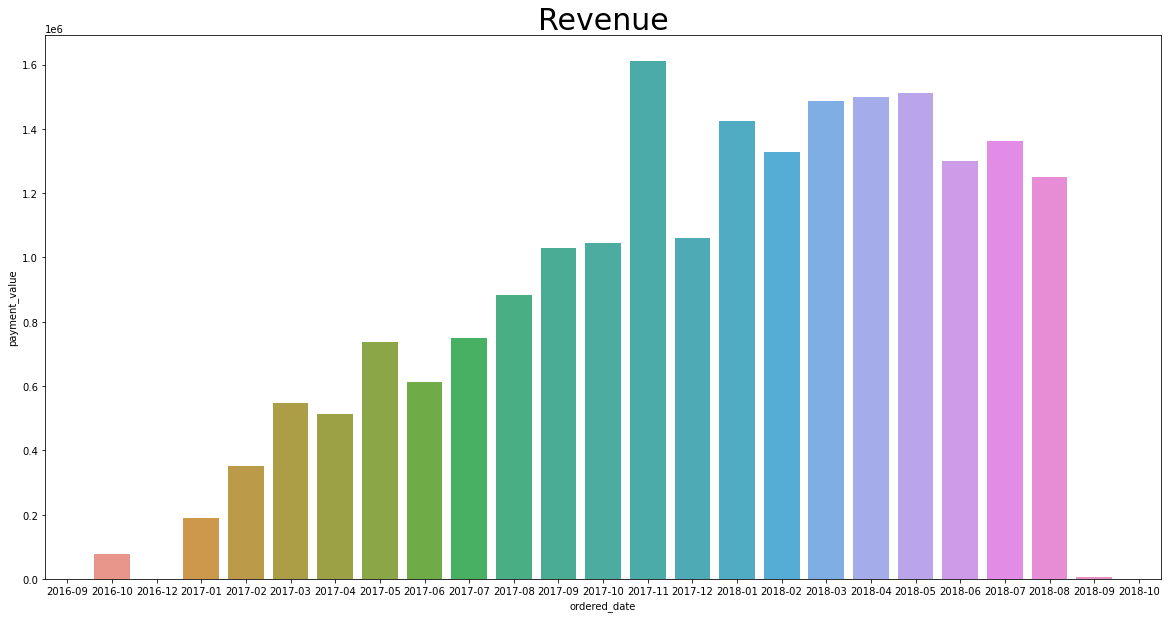

In [1065]:
plt.figure(figsize=(20,10))
sns.barplot(data=monthly_revenue,x='ordered_date',y='payment_value')
plt.title("Revenue",fontsize=30)
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

#### Sales 

#### Monthly Sales

In [1066]:
df.head(3)

,customer_city,customer_id,customer_state,freight_value,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,order_purchase_timestamp,order_status,payment_installments,payment_sequential,payment_type,payment_value,price,product_category_name,product_id,product_name_lenght,product_photos_qty,product_weight_g,review_creation_date,review_id,review_score,seller_city,seller_id,seller_state,shipping_limit_date,ordered_date,ordered_date_str,start_date
0,Adilabad,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh,21.88,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,00e7ee1b050b8499577073aeb2a297a1,1.0,2017-05-16 15:05:00,delivered,2.0,1.0,credit_card,146.87,124.99,Office_Furniture,a9516a079e37a9c9c36b9b78b10169e8,41.0,1.0,8683.0,2017-05-26,88b8b52d46df026a9d1ad2136a59b30b,4,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2017-05-22 15:22:00,2017-05,2017-05,2017-05
1,Adoni,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh,46.48,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,29150127e6685892b6eab3eec79f59c7,1.0,2018-01-12 20:48:00,delivered,8.0,1.0,credit_card,335.48,289.00,Housewares,4aa6014eceb682077f9dc4bffebc05b0,43.0,3.0,10150.0,2018-01-30,02fc48a9efa3e3d0f1a8ea26507eeec3,5,Sadasivpet,b8bc237ba3788b23da09c0f1f3a3288c,Andhra Pradesh,2018-01-18 20:58:00,2018-01,2018-01,2018-01
2,Akkarampalle,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh,17.79,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,2018-05-19 16:07:00,delivered,7.0,1.0,credit_card,157.73,139.94,Office_Furniture,bd07b66896d6f1494f5b86251848ced7,55.0,1.0,8267.0,2018-06-15,5ad6695d76ee186dc473c42706984d87,5,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2018-06-05 16:19:00,2018-05,2018-05,2018-05


In [1067]:
df["order_month"] =df.order_purchase_timestamp.dt.month
monthly_revenue = df.groupby(['order_month'])['payment_value'].sum().reset_index()

In [1068]:
monthly_revenue

,order_month,payment_value
0,1,1616267.67
1,2,1679493.75
2,3,2034439.48
3,4,2012546.68
4,5,2249436.06
5,6,1913460.58
6,7,2111509.92
7,8,2133110.99
8,9,1035435.09
9,10,1123652.21


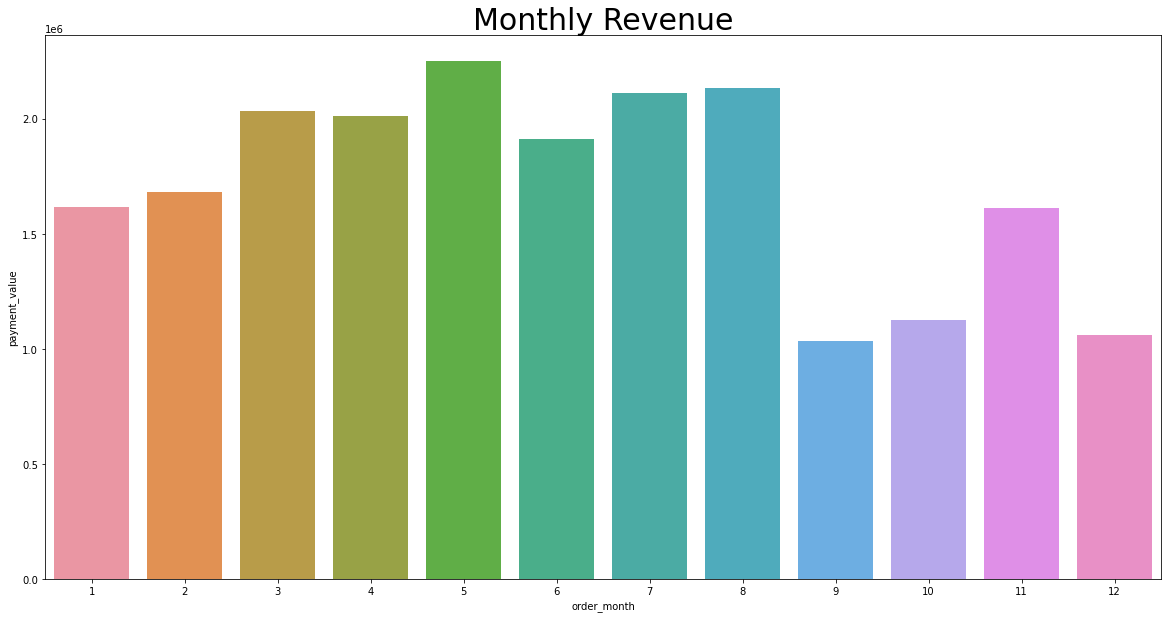

In [1069]:
plt.figure(figsize=(20,10))
sns.barplot(data=monthly_revenue,x='order_month',y='payment_value')
plt.title("Monthly Revenue",fontsize=30)
plt.show()

### Sales By Product Category

In [56]:
df.groupby(["product_category_name"])['payment_value'].sum().reset_index().sort_values(by='payment_value',ascending=False)

,product_category_name,payment_value
7,Bed_Bath_Table,1744205.53
43,Health_Beauty,1663076.30
15,Computers_Accessories,1599574.66
39,Furniture_Decor,1444383.69
70,Watches_Gifts,1430553.48
...,...,...
35,Flowers,2213.01
46,Home_Comfort_2,1710.54
11,Cds_Dvds_Musicals,1199.43
29,Fashion_Childrens_Clothes,785.67


### Sales By Product City

In [57]:
df.groupby(["customer_city"])['payment_value'].sum().reset_index().sort_values(by='payment_value',ascending=False)

,customer_city,payment_value
55,Akkarampalle,2902209.75
284,Badepalle,1581736.07
148,Anantapur,509165.81
1099,Eddumailaram,435971.02
142,Anakapalle,333582.09
...,...,...
2589,Nagojanahalli,24.23
2871,Panihati,24.09
189,Arimalam,22.58
2478,Moonak,20.70


## Sales by seller City

In [58]:
df.groupby(["seller_city"])['payment_value'].sum().reset_index().sort_values(by='payment_value',ascending=False)

,seller_city,payment_value
11,Akkarampalle,4283075.79
481,Tarsali,1076744.78
24,Anakapalle,660358.07
520,Vijayawada,579187.43
71,Bestavaripeta,511975.50
...,...,...
244,Jhajjar,42.49
109,Bugganipalle,42.05
386,Osmanabad,38.37
330,Mahad,28.22


### Sales wrt to Payment Type

In [59]:
df.groupby('payment_type')['payment_value'].sum()

payment_type
UPI             4110920.74
credit_card    15776896.15
debit_card       257374.89
not_defined           0.00
voucher          435917.84
Name: payment_value, dtype: float64

### Sales w.r.t Payment Channels

In [ ]:
df.groupby('payment_sequential')['payment_value'].sum()

### f. Popular Products by month, seller, state, category

I uese Product Category since product name is not given

### Popular Products by month

In [351]:
df.head()

,customer_city,customer_id,customer_state,freight_value,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,order_purchase_timestamp,order_status,payment_installments,payment_sequential,payment_type,payment_value,price,product_category_name,product_id,product_name_lenght,product_photos_qty,product_weight_g,review_creation_date,review_id,review_score,seller_city,seller_id,seller_state,shipping_limit_date,ordered_date
0,Adilabad,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh,21.88,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,00e7ee1b050b8499577073aeb2a297a1,1.0,2017-05-16 15:05:00,delivered,2.0,1.0,credit_card,146.87,124.99,Office_Furniture,a9516a079e37a9c9c36b9b78b10169e8,41.0,1.0,8683.0,2017-05-26,88b8b52d46df026a9d1ad2136a59b30b,4,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2017-05-22 15:22:00,2017-05
1,Adoni,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh,46.48,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,29150127e6685892b6eab3eec79f59c7,1.0,2018-01-12 20:48:00,delivered,8.0,1.0,credit_card,335.48,289.00,Housewares,4aa6014eceb682077f9dc4bffebc05b0,43.0,3.0,10150.0,2018-01-30,02fc48a9efa3e3d0f1a8ea26507eeec3,5,Sadasivpet,b8bc237ba3788b23da09c0f1f3a3288c,Andhra Pradesh,2018-01-18 20:58:00,2018-01
2,Akkarampalle,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh,17.79,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,2018-05-19 16:07:00,delivered,7.0,1.0,credit_card,157.73,139.94,Office_Furniture,bd07b66896d6f1494f5b86251848ced7,55.0,1.0,8267.0,2018-06-15,5ad6695d76ee186dc473c42706984d87,5,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2018-06-05 16:19:00,2018-05
3,Akkayapalle,b2b6027bc5c5109e529d4dc6358b12c3,Andhra Pradesh,23.36,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,951670f92359f4fe4a63112aa7306eba,1.0,2018-03-13 16:06:00,delivered,1.0,1.0,credit_card,173.30,149.94,Office_Furniture,a5647c44af977b148e0a3a4751a09e2e,48.0,1.0,12160.0,2018-03-29,059a801bb31f6aab2266e672cab87bc5,5,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2018-03-27 16:31:00,2018-03
4,Alwal,4f2d8ab171c80ec8364f7c12e35b23ad,Andhra Pradesh,22.25,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,2018-07-29 09:51:00,delivered,8.0,1.0,credit_card,252.25,230.00,Home_Confort,9391a573abe00141c56e38d84d7d5b3b,61.0,1.0,5200.0,2018-08-10,8490879d58d6c5d7773f2739a03f089a,5,Tarsali,4a3ca9315b744ce9f8e9374361493884,Gujarat,2018-07-31 10:10:00,2018-07


In [61]:
df['ordered_date_str'] =df['ordered_date'].astype('str')

In [62]:
df_new =df.sort_values(by='ordered_date').groupby(['ordered_date_str','product_category_name'])['payment_value'].sum().reset_index()

In [246]:
df_new.head(2)

,ordered_date_str,product_category_name,payment_value
0,2016-09,Furniture_Decor,272.46
1,2016-09,Health_Beauty,0.00


In [64]:
#df_new.loc[(df_new['ordered_date_str']=='2018-10'),:].sort_values(by='payment_value',ascending=False)

In [65]:
dates = df.sort_values(by='ordered_date')['ordered_date_str'].unique().tolist()


In [257]:
a ={'Date':[], 'Product': [],"Payment":[]}


for i in dates:
    a['Date'].append(i)
    a['Product'].append(df_new.loc[df_new['payment_value']==df_new.loc[df_new['ordered_date_str']==i,'payment_value'].max(),'product_category_name'].to_string(index=False))
    a['Payment'].append(df_new.loc[df_new['payment_value']==df_new.loc[df_new['ordered_date_str']==i,'payment_value'].max(),'payment_value'].to_string(index=False))


In [258]:
pd.DataFrame(a).head(5)

,Date,Product,Payment
0,2016-09,Furniture_Decor,272.46
1,2016-10,Furniture_Decor,11711.5
2,2016-12,Fashion_Bags_Accessories,19.62
3,2017-01,Furniture_Decor,28138.15
4,2017-02,Furniture_Decor,36111.47


### Popular Products by seller

In [68]:
sellers.shape

(3095, 4)

In [262]:
sellers.seller_id.nunique()

3095

In [259]:
df.groupby(['seller_id','product_category_name'])['payment_value'].sum()

seller_id                         product_category_name          
0015a82c2db000af6aaaf3ae2ecb0532  Small_Appliances                    2748.06
001cca7ae9ae17fb1caed9dfb1094831  Construction_Tools_Construction     6706.34
                                  Garden_Tools                       41642.88
001e6ad469a905060d959994f1b41e4f  Sports_Leisure                       267.94
002100f778ceb8431b7a1020ff7ab48f  Furniture_Decor                     2478.33
                                                                       ...   
ffff564a4f9085cd26170f4732393726  Construction_Tools_Construction      126.69
                                  Electronics                           44.92
                                  Food                                 141.07
                                  Housewares                            96.60
                                  Market_Place                          80.94
Name: payment_value, Length: 6352, dtype: float64

In [263]:
df_seller = pd.pivot_table(data=df,index=['seller_id','product_category_name'],values='payment_value',aggfunc='sum').reset_index()

In [264]:
df_seller.head(3)

,seller_id,product_category_name,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,Small_Appliances,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,Construction_Tools_Construction,6706.34
2,001cca7ae9ae17fb1caed9dfb1094831,Garden_Tools,41642.88


In [265]:
a ={'Seller':[], 'Product': [],"Payment":[]}


for i in df.seller_id.unique():
    a['Seller'].append(i)
    a['Product'].append(df_seller.loc[df_seller['payment_value']==df_seller.loc[df_seller['seller_id']==i,'payment_value'].max(),'product_category_name'].to_string(index=False))
    a['Payment'].append(df_seller.loc[df_seller['payment_value']==df_seller.loc[df_seller['seller_id']==i,'payment_value'].max(),'payment_value'].to_string(index=False))


In [266]:
a1 =pd.DataFrame(a)

In [267]:
a1

,Seller,Product,Payment
0,7c67e1448b00f6e969d365cea6b010ab,Office_Furniture,475373.78
1,b8bc237ba3788b23da09c0f1f3a3288c,Housewares,17634.04
2,4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,249288.45
3,8f2ce03f928b567e3d56181ae20ae952,Sports_Leisure,37539.65
4,9f505651f4a6abe901a56cdc21508025,Computers_Accessories,32220.45
...,...,...,...
3091,4ce6e5f6c52515177e18c1c9361d8677,Auto,252.27
3092,9140ef75cc8211c4035935e80e567204,Pet_Shop,72.18
3093,da4d149c0ddbac90557103ac0a0ec356,Home_Construction,775.98
3094,377bc18334c78dd2f1535ef22a3ad225,Garden_Tools,224.44


### Popular Products By City 



In [268]:
df_city = df.groupby(['customer_city','product_category_name'])['payment_value'].sum().reset_index()


In [269]:
a ={'Seller':[], 'Product': [],"Payment":[]}


for i in df.customer_city.unique():
    a['Seller'].append(i)
    a['Product'].append(df_city.loc[(df_city['payment_value']==df_city.loc[df_city['customer_city']==i,'payment_value'].max())& (df_city['customer_city']==i),'product_category_name'].to_string(index=False))
    a['Payment'].append(df_city.loc[(df_city['payment_value']==df_city.loc[df_city['customer_city']==i,'payment_value'].max())&(df_city['customer_city']==i),'payment_value'].to_string(index=False))


In [270]:
pd.DataFrame(a)

,Seller,Product,Payment
0,Adilabad,Furniture_Decor,13593.83
1,Adoni,Furniture_Decor,14604.05
2,Akkarampalle,Bed_Bath_Table,298667.18
3,Akkayapalle,Bed_Bath_Table,12388.13
4,Alwal,Bed_Bath_Table,26752.33
...,...,...,...
4114,Curchorem Cacora,Telephony,77.03
4115,Curti,Sports_Leisure,138.89
4116,Davorlim,Cool_Stuff,50.34
4117,Goa Velha,Electronics,62.28


##  *<font color='red'>h.List top 10 most expensive products sorted by price </font>*

In [1072]:
df[['product_id','price']].sort_values(by='price',ascending=False)

,product_id,price
16177,489ae2aa008f021502940f251d4cce7f,6735.0
25418,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0
4700,1bdf5e6731585cf01aa8169c7028d6ad,6499.0
32766,a6492cc69376c469ab6f61d8f44de961,4799.0
14462,c3ed642d592594bb648ff4a04cee2747,4690.0
...,...,...
117740,NaN,NaN
117800,NaN,NaN
118090,NaN,NaN
118196,NaN,NaN


### Top 10 expensive product category

In [1073]:
df.groupby('product_category_name')['price'].sum().reset_index().sort_values(by='price',ascending=False).head(10)

,product_category_name,price
43,Health_Beauty,1302046.97
70,Watches_Gifts,1254322.95
7,Bed_Bath_Table,1107397.98
65,Sports_Leisure,1029631.88
15,Computers_Accessories,950134.59
39,Furniture_Decor,772496.16
49,Housewares,668880.94
20,Cool_Stuff,664637.13
5,Auto,618395.50
42,Garden_Tools,519473.33


# 2. Performing Customers/sellers Segmentation


### a. Divide the customers into groups based on the revenue generated 

In [81]:
df.payment_value.describe()

count    119148.000000
mean        172.735670
std         267.770023
min           0.000000
25%          60.850000
50%         108.160000
75%         189.240000
max       13664.080000
Name: payment_value, dtype: float64

In [82]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 500, 1000, 10000, 20000]


In [83]:
df_customer = df.groupby('customer_id')['payment_value'].sum().reset_index()
df_customer['Revenue_Levels'] = pd.cut(df_customer['payment_value'], bins=cut_bins, labels=cut_labels_4,)

df_customer.sample(10)

,customer_id,payment_value,Revenue_Levels
77151,c5d9eeca2c5b52da55d9a4a312e3e278,90.67,silver
90317,e808442ade9d84c082db6c3fa005c8fb,77.57,silver
86495,de346ebcb74674350a541a1438944479,98.79,silver
90437,e852487a1087dd7a5a8f78cda9e2ac86,30.75,silver
46846,78e21576614d5285cbd63410d6c0efaa,82.92,silver
48551,7d3be011d4a41aacfcdc7399e67d15df,188.89,silver
70117,b4178949fd16cbd3f1f0c8b00e7773be,40.28,silver
9300,17ebde2c7188073ca37d90c062e25aed,30.44,silver
40704,6950e00305cacdb75bd497302c430d68,59.60,silver
86435,de017a7470c1080fb969cf1241087883,77.27,silver


In [84]:
df_customer.groupby('Revenue_Levels')['customer_id'].count().reset_index()


,Revenue_Levels,customer_id
0,silver,92314
1,gold,4748
2,platinum,2343
3,diamond,24


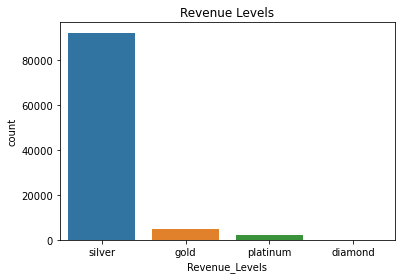

In [85]:
plt.title("Revenue Levels")
sns.countplot(data=df_customer,x='Revenue_Levels')
plt.show()

### b. Divide the sellers into groups based on the revenue generated 

In [86]:
df.seller_id.nunique()

3095

In [87]:
df_seller = df.groupby('seller_id')['payment_value'].sum().reset_index()
df_seller['Revenue_Levels'] = pd.cut(df_seller['payment_value'], bins=cut_bins, labels=cut_labels_4)



In [88]:
df_seller.groupby('Revenue_Levels')['seller_id'].count().reset_index()


,Revenue_Levels,seller_id
0,silver,1006
1,gold,393
2,platinum,1245
3,diamond,248


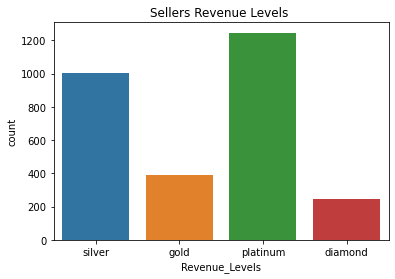

In [89]:
plt.title("Sellers Revenue Levels ")
sns.countplot(data=df_seller,x='Revenue_Levels')
plt.show()

## 3. Cross-Selling (Which products are selling together)

Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

### Using Apriori Algo

In [632]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [633]:
df.head(2)

,customer_city,customer_id,customer_state,freight_value,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,order_purchase_timestamp,order_status,payment_installments,payment_sequential,payment_type,payment_value,price,product_category_name,product_id,product_name_lenght,product_photos_qty,product_weight_g,review_creation_date,review_id,review_score,seller_city,seller_id,seller_state,shipping_limit_date,ordered_date,start_date
0,Adilabad,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh,21.88,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,00e7ee1b050b8499577073aeb2a297a1,1.0,2017-05-16 15:05:00,delivered,2.0,1.0,credit_card,146.87,124.99,Office_Furniture,a9516a079e37a9c9c36b9b78b10169e8,41.0,1.0,8683.0,2017-05-26,88b8b52d46df026a9d1ad2136a59b30b,4,Vijayawada,7c67e1448b00f6e969d365cea6b010ab,Andhra Pradesh,2017-05-22 15:22:00,2017-05,2017-05
1,Adoni,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh,46.48,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,29150127e6685892b6eab3eec79f59c7,1.0,2018-01-12 20:48:00,delivered,8.0,1.0,credit_card,335.48,289.00,Housewares,4aa6014eceb682077f9dc4bffebc05b0,43.0,3.0,10150.0,2018-01-30,02fc48a9efa3e3d0f1a8ea26507eeec3,5,Sadasivpet,b8bc237ba3788b23da09c0f1f3a3288c,Andhra Pradesh,2018-01-18 20:58:00,2018-01,2018-01


In [634]:
baskets = df.groupby('order_id')['product_id'].nunique().reset_index()

In [635]:
two_prod =baskets[baskets['product_id']>1]['order_id'].tolist()

In [636]:
baskets.sample(2)

,order_id,product_id
11614,1de86d094f7dd41cca13d246d3b7fd07,1
14358,25133adfabbfa91f52ed184519933c11,1


In [637]:
baskets =df[df['order_id'].isin(two_prod)]

In [638]:
mybaskets =baskets.groupby(['order_id','product_category_name'])['order_item_id'].count().unstack().reset_index().fillna(0).set_index('order_id')

In [648]:
mybaskets_sets

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,Books_Technical,Christmas_Supplies,Cine_Photo,Computers,Computers_Accessories,Consoles_Games,Construction_Tools_Construction,Construction_Tools_Lights,Construction_Tools_Safety,Cool_Stuff,Costruction_Tools_Garden,Drinks,Dvds_Blu_Ray,Electronics,Fashio_Female_Clothing,...,Home_Appliances_2,Home_Comfort_2,Home_Confort,Home_Construction,Housewares,Industry_Commerce_And_Business,Kitchen_Dining_Laundry_Garden_Furniture,La_Cuisine,Luggage_Accessories,Market_Place,Music,Musical_Instruments,Office_Furniture,Party_Supplies,Perfumery,Pet_Shop,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002f98c0f7efd42638ed6100ca699b42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
005d9a5423d47281ac463a968b3936fb,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0097f0545a302aafa32782f1734ff71c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb18bf111fa70edf316eb0390427986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffb8f7de8940249a3221252818937ecb,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [639]:
mybaskets.sample(3)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,Books_Technical,Christmas_Supplies,Cine_Photo,Computers,Computers_Accessories,Consoles_Games,Construction_Tools_Construction,Construction_Tools_Lights,Construction_Tools_Safety,Cool_Stuff,Costruction_Tools_Garden,Drinks,Dvds_Blu_Ray,Electronics,Fashio_Female_Clothing,...,Home_Appliances_2,Home_Comfort_2,Home_Confort,Home_Construction,Housewares,Industry_Commerce_And_Business,Kitchen_Dining_Laundry_Garden_Furniture,La_Cuisine,Luggage_Accessories,Market_Place,Music,Musical_Instruments,Office_Furniture,Party_Supplies,Perfumery,Pet_Shop,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f86672be5bf85864e88a08f231b43c2d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02beac5428ccbd30f4b3fbded058289f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
f6ac0ce30d1405684969749ebc798f94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [640]:
def my_encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        #rint(1)
        return 1
    
mybaskets_sets = mybaskets.applymap(my_encode_units)


In [ ]:
mybaskets_sets.head(2)

In [727]:
my_freq_sets =apriori(mybaskets_sets,use_colnames=True,min_support=0.01)
my_freq_sets.head(5)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037473,(Auto)
1,0.040260,(Baby)
2,0.247755,(Bed_Bath_Table)
3,0.069681,(Computers_Accessories)
4,0.011459,(Construction_Tools_Construction)


In [728]:
rules = association_rules(my_freq_sets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Home_Confort),(Bed_Bath_Table),0.017962,0.247755,0.013317,0.741379,2.992392,0.008867,2.908682
1,(Bed_Bath_Table),(Home_Confort),0.247755,0.017962,0.013317,0.053750,2.992392,0.008867,1.037821


### The above two product categories are selling together

### Product IDs selling together

In [1118]:
prod_baskets =baskets.groupby(['order_id','product_id'])['order_item_id'].count().unstack().reset_index().fillna(0).set_index('order_id')

In [1124]:
#prod_baskets1[prod_baskets1["order_id"]=='0420dbc50fc554e303e4b2d6b39063f6'].sum(axis=1)

prod_baskets = prod_baskets.applymap(my_encode_units)


In [1139]:
product_together = dict({"order_id":[],'product_names':[]})
pd.DataFrame(product_together)

,order_id,product_names


In [1144]:
prod_baskets1 = prod_baskets.reset_index()     
l1 = prod_baskets1.columns.difference(["order_id"]).tolist()
for i in prod_baskets1.order_id[:10]: #finding for 10 orderIds
    l2=list()
    product_together['order_id'].append(i)
    for j in l1:
        if (prod_baskets1.loc[(prod_baskets1['order_id']==i),j]==1).bool():
            l2.append(j)
    product_together['product_names'].append(l2)
 

In [1141]:
product_set = pd.DataFrame(product_together)

In [1142]:
product_set

,order_id,product_names
0,002f98c0f7efd42638ed6100ca699b42,"[880be32f4db1d9f6e2bec38fb6ac23ab, d41dc2f2979..."
1,00337fe25a3780b3424d9ad7c5a4b35e,"[13944d17b257432717fd260e69853140, 1f9799a175f..."
2,005d9a5423d47281ac463a968b3936fb,"[4c3ae5db49258df0784827bdacf3b396, fb7a100ec8c..."
3,00946f674d880be1f188abc10ad7cf46,"[4dcb49b9ca7e48d2f108d40caa77caa2, 9bb2d066e4b..."
4,0097f0545a302aafa32782f1734ff71c,"[636598095d69a5718e67d2c9a3c7dde6, b6397895a17..."


#### with value counts we can find which products are sold together

In [1143]:
product_set['product_names'].value_counts().reset_index().sort_values(by="product_names",ascending=False)

,index,product_names
0,"[880be32f4db1d9f6e2bec38fb6ac23ab, d41dc2f2979...",1
1,"[13944d17b257432717fd260e69853140, 1f9799a175f...",1
2,"[4c3ae5db49258df0784827bdacf3b396, fb7a100ec8c...",1
3,"[4dcb49b9ca7e48d2f108d40caa77caa2, 9bb2d066e4b...",1
4,"[636598095d69a5718e67d2c9a3c7dde6, b6397895a17...",1


### 4. Payment Behaviour

#### a. How customers are paying?


In [113]:
df.payment_type.value_counts().reset_index()

,index,payment_type
0,credit_card,87784
1,UPI,23190
2,voucher,6465
3,debit_card,1706
4,not_defined,3


#### Customers use Credit Card more

#### b. Which payment channels are used by most customers?

In [ ]:
payment_sequential is the different channel


In [623]:
df.groupby(['payment_sequential'])['customer_id'].nunique().reset_index()

,payment_sequential,customer_id
0,1.0,99360
1,2.0,3039
2,3.0,581
3,4.0,278
4,5.0,170
5,6.0,118
6,7.0,82
7,8.0,54
8,9.0,43
9,10.0,34


## 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?


Review 5 is the highest rating while 1 is the lowest rating 

##### There are records of customer with different payment sequential for same product purchase with same review so considering them as duplicates and removing the duplicates

In [625]:
df_cust = df[['customer_id','product_category_name','review_score']]
df_cust.drop_duplicates(keep='first',inplace=True)

In [626]:
df_cust.head(2)

,customer_id,product_category_name,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,Office_Furniture,4
1,18955e83d337fd6b2def6b18a428ac77,Housewares,5


##### Finding the Most reviewed top 10 Products 

In [628]:

df_review= df_cust.groupby(['product_category_name'])['review_score'].count().reset_index()
#df_review.sort_values(by='review_score').tail(10)

df_review.sort_values(by='review_score',ascending=False,inplace=True)

print("Below are the most reviewed product category")
df_review.head(10)

Below are the most reviewed product category


,product_category_name,review_score
7,Bed_Bath_Table,9476
43,Health_Beauty,8851
65,Sports_Leisure,7734
15,Computers_Accessories,6712
39,Furniture_Decor,6476
49,Housewares,5890
70,Watches_Gifts,5630
68,Telephony,4199
5,Auto,3902
69,Toys,3889


In [211]:
#taking these 10 categories
top_prods=df_cust[df_cust['product_category_name'].isin(df_review['product_category_name'].head(10).tolist())]

## Looking how the ratings are distributed for the top 10 categories

In [220]:
pd.pivot_table(data=top_prods,index='product_category_name',columns='review_score',aggfunc='count')

customer_id                      
review_score                    1    2    3     4     5
product_category_name                                  
Auto                          450  128  302   810  2212
Bed_Bath_Table               1251  398  962  1876  4989
Computers_Accessories         873  229  548  1355  3707
Furniture_Decor               850  262  576  1195  3593
Health_Beauty                 939  220  695  1588  5409
Housewares                    615  191  502  1120  3462
Sports_Leisure                836  197  568  1479  4654
Telephony                     502  162  418   904  2213
Toys                          414  100  297   686  2392
Watches_Gifts                 681  199  490  1059  3201

### We know that the top rate is 5. Soranking the product category with number of times it has received 5 as rating

In [629]:
df_5 =df_cust.loc[df_cust['review_score']==5,'product_category_name'].value_counts().reset_index()

df_5.rename(columns={'index':'Product_name','product_category_name':'Ratings'},inplace=True)

df_5.sort_values(by='Ratings',ascending=False,inplace=True)



### Products which was many time rated 5 

In [194]:
df_5.head(10)

,Product_name,Ratings
0,Health_Beauty,5409
1,Bed_Bath_Table,4989
2,Sports_Leisure,4654
3,Computers_Accessories,3707
4,Furniture_Decor,3593
5,Housewares,3462
6,Watches_Gifts,3201
7,Toys,2392
8,Telephony,2213
9,Auto,2212


### Similarly ranking least rated product i.e Rated 1 Products

### Ranking them with number of times it had got 1 rating

In [630]:
df_1 =df_cust.loc[df_cust['review_score']==1,'product_category_name'].value_counts().reset_index()

df_1.rename(columns={'index':'Product_name','product_category_name':'Ratings'},inplace=True)

df_1.sort_values(by='Ratings',ascending=False,inplace=True)


In [631]:
df_1.head(10)

,Product_name,Ratings
0,Bed_Bath_Table,1251
1,Health_Beauty,939
2,Computers_Accessories,873
3,Furniture_Decor,850
4,Sports_Leisure,836
5,Watches_Gifts,681
6,Housewares,615
7,Telephony,502
8,Auto,450
9,Toys,414


### c. Average rating by location, seller, product, category, month etc.


#### Average Rating by City

In [226]:
df_city = df[['customer_id','customer_city','product_category_name','review_score']]
df_city.drop_duplicates(keep='first',inplace=True)

In [231]:
df_city.groupby('customer_city')['review_score'].mean().reset_index()

,customer_city,review_score
0,Aadityana,3.611111
1,Aambaliyasan,3.500000
2,Aantaliya,3.978495
3,Aarambhada,3.711111
4,Abiramam,5.000000
...,...,...
4114,Zamin Uthukuli,4.000000
4115,Ziauddin Pur,3.957746
4116,Zira,4.500000
4117,Zirakpur,4.500000


### Average Rating by Product_category

In [232]:
df_product= df[['customer_id','product_category_name','review_score']]
df_product.drop_duplicates(keep='first',inplace=True)

In [233]:
df_city.groupby('product_category_name')['review_score'].mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.021978
1,Air_Conditioning,3.980237
2,Art,4.004950
3,Arts_And_Craftmanship,4.173913
4,Audio,3.811966
...,...,...
66,Stationery,4.232166
67,Tablets_Printing_Image,4.075949
68,Telephony,3.991665
69,Toys,4.167909


### Average Rating fo Seller

In [235]:
df_seller= df[['seller_id','product_category_name','review_score']]
df_seller.drop_duplicates(keep='first',inplace=True)

In [239]:
df_seller.groupby("seller_id").review_score.mean().reset_index()


,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.000000
1,001cca7ae9ae17fb1caed9dfb1094831,3.222222
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.000000
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3.428571
3092,ffeee66ac5d5a62fe688b9d26f83f534,3.333333
3093,fffd5413c0700ac820c7069d66d98c89,2.800000


### Average Rating by date

In [241]:
df.groupby('ordered_date')['review_score'].mean().reset_index()

,ordered_date,review_score
0,2016-09,1.000000
1,2016-10,3.485075
2,2016-12,5.000000
3,2017-01,4.066667
4,2017-02,3.983043
5,2017-03,4.020352
6,2017-04,3.951703
7,2017-05,4.097436
8,2017-06,4.100701
9,2017-07,4.076985


In [737]:
print("*"*127)

*******************************************************************************************************************************
